In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.impute import SimpleImputer
import numpy as np

# Load the Data

In [23]:
df = pd.read_csv('Salary Data.csv')
df.head()
imputer = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')
df[['Years of Experience','Salary']] = imputer.fit_transform(df[['Years of Experience','Salary']])
df[['Education Level','Job Title']] = imputer_cat.fit_transform(df[['Education Level','Job Title']])
df.isnull().sum()

Age                    2
Gender                 2
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [24]:
X = df[['Education Level','Job Title','Years of Experience']]
Y = df['Salary']


In [25]:
X = pd.get_dummies(X)

In [26]:
X_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [27]:
model = RandomForestRegressor(n_estimators=100,random_state=42)


In [28]:
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [29]:
predictions = model.predict(x_test)

In [30]:
predictions

array([158405.95238095, 103069.28150134, 133200.        ,  98700.        ,
       158846.46825397, 176113.33333333, 135950.        , 112011.54691689,
        48800.        , 102400.        , 134650.        , 132750.        ,
        40000.        , 101150.        ,  59100.        , 153213.92857143,
        55302.38095238,  42600.        ,  89000.        ,  92800.        ,
       110428.86729223, 108050.        , 157842.08874459,  52250.        ,
       102319.28150134,  61300.        , 174450.        , 102086.82171582,
       158405.95238095, 169700.        ,  46900.        , 124400.        ,
        46900.        , 150000.        ,  92150.        ,  35300.        ,
       175333.33333333,  40000.        ,  40000.        ,  57250.        ,
        40000.        ,  89940.        , 143150.        , 170700.        ,
        40000.        , 157842.08874459, 110961.54691689,  42450.        ,
        40000.        ,  40000.        , 103069.28150134,  93450.        ,
        85000.        , 1

In [38]:
mse = mean_squared_error(y_test,predictions)
mae = mean_absolute_error(y_test,predictions)
r2 = r2_score(y_test,predictions)
print("MSE error is: ", mse)
print("MAE error is: ",mae)
print("RMSE error is: ",np.sqrt(mse))
print("R2 is: ",r2)

MSE error is:  335101310.61583954
MAE error is:  11090.8435828475
RMSE error is:  18305.77260363079
R2 is:  0.8616711348610706


In [39]:
import joblib
joblib.dump(model, 'Salary_Predict_Model.pkl')

['Salary_Predict_Model.pkl']

In [47]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Get one of the trees from the forest (for example, the first tree)
tree = model.estimators_[0]

# Plot the tree
plt.figure(figsize=(20, 10), dpi=1000)  # Set DPI to 300
plot_tree(tree, feature_names=X_train.columns, filled=True)
plt.savefig('tree.png', dpi=1000)  # Save the plot as a .png file with lower DPI
plt.show()


In [48]:
import seaborn as sns

In [49]:
results = pd.DataFrame({'Actual Salary': y_test, 'Predicted Salary': predictions})
results['Residuals'] = results['Actual Salary'] - results['Predicted Salary']

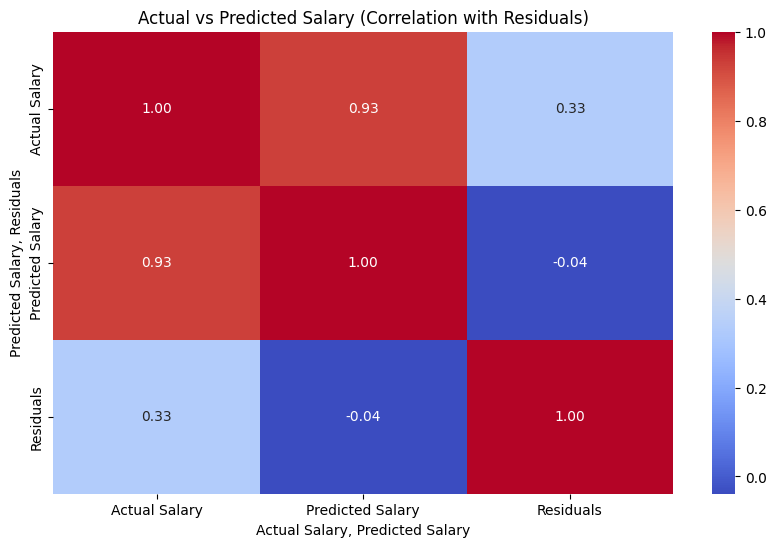

In [50]:
# Plot heatmap with residuals
plt.figure(figsize=(10, 6))
sns.heatmap(results[['Actual Salary', 'Predicted Salary', 'Residuals']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Actual vs Predicted Salary (Correlation with Residuals)')
plt.xlabel('Actual Salary, Predicted Salary')
plt.ylabel('Predicted Salary, Residuals')
plt.show()


# Use Saved Model

In [51]:
sv_model = joblib.load('Salary_Predict_Model.pkl')


In [56]:
y_predict= sv_model.predict(x_test)

In [57]:
y_predict

array([158405.95238095, 103069.28150134, 133200.        ,  98700.        ,
       158846.46825397, 176113.33333333, 135950.        , 112011.54691689,
        48800.        , 102400.        , 134650.        , 132750.        ,
        40000.        , 101150.        ,  59100.        , 153213.92857143,
        55302.38095238,  42600.        ,  89000.        ,  92800.        ,
       110428.86729223, 108050.        , 157842.08874459,  52250.        ,
       102319.28150134,  61300.        , 174450.        , 102086.82171582,
       158405.95238095, 169700.        ,  46900.        , 124400.        ,
        46900.        , 150000.        ,  92150.        ,  35300.        ,
       175333.33333333,  40000.        ,  40000.        ,  57250.        ,
        40000.        ,  89940.        , 143150.        , 170700.        ,
        40000.        , 157842.08874459, 110961.54691689,  42450.        ,
        40000.        ,  40000.        , 103069.28150134,  93450.        ,
        85000.        , 1